Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [33]:
import pandas as pd
# Source: https://www.kaggle.com/datasnaek/league-of-legends
url = 'https://raw.githubusercontent.com/jonDuke/DS-Unit-2-Applied-Modeling/master/module1-define-ml-problems/games.csv'
df = pd.read_csv(url)

# This dataset is about 51k individual matches in the game League of Legends
# I have separate .json files that map the champion and spell id's to names,
# so converting those to categorical columns can happen later.
print(df.shape)
df.head()

(51490, 61)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


### Choose your target. Which column in your tabular dataset will you predict?

The winner column, which tells if team 1 or team 2 won the match.

### Is your problem regression or classification?

Classification because there is only 2 possible outcomes.

### How is your target distributed?

50/50

In [34]:
# I will predict the winner column, it is a binary value showing which team won
# It is evenly distributed, so the majority baseline is just 50%
df['winner'].value_counts(normalize=True)

1    0.506448
2    0.493552
Name: winner, dtype: float64

### Choose your evaluation metric(s)

Accuracy will be fine here, though I will be looking at other scores so I can practice them as well.

### Choose which observations you will use to train, validate, and test your model.

  - Are some observations outliers? Will you exclude them?
    - I have no extreme outliers here, will not exclude anything.
  - Will you do a random split or a time-based split?
    - Since I have a creationTime column, I can to a time-based split.
    - I expect a random split wouldn't change the result much, and may test that later.

In [35]:
# Shift creation time so the first one starts at 0
df['creationTime'] = df['creationTime'] - df['creationTime'].min()
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,6.033928e+09,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,0.000000e+00,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,5.129752e+09,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,6.952308e+09,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,7.460211e+09,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,7.815637e+09,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


## Begin to clean and explore your data

### Converting id's to names

In [36]:
# Read the champion info .json
champ_info = pd.read_json('champion_info.json')
champ_info.head()

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."
101,champion,7.17.2,"{'title': 'the Magus Ascendant', 'id': 101, 'k..."
102,champion,7.17.2,"{'title': 'the Half-Dragon', 'id': 102, 'key':..."
103,champion,7.17.2,"{'title': 'the Nine-Tailed Fox', 'id': 103, 'k..."


In [37]:
# Example data dict
# 'id' matches the index in the json, and the id used in the main data
champ_info.loc[1, 'data']

{'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'}

In [38]:
# Get champion columns (10 players per match, each can pick and ban 1 champ)
columns = df.columns
champ_cols = columns[columns.str.contains('id')]
champ_cols = champ_cols.append(columns[columns.str.contains('ban')])
champ_cols

Index(['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id',
       't1_champ5id', 't2_champ1id', 't2_champ2id', 't2_champ3id',
       't2_champ4id', 't2_champ5id', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5'],
      dtype='object')

In [39]:
# Columns before
df[champ_cols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,8,432,96,11,112,104,498,122,238,412,92,40,69,119,141,114,67,43,16,51
1,119,39,76,10,35,54,25,120,157,92,51,122,17,498,19,11,67,238,51,420
2,18,141,267,68,38,69,412,126,24,22,117,40,29,16,53,157,238,121,57,28
3,57,63,29,61,36,90,19,412,92,22,238,67,516,114,31,164,18,141,40,51
4,19,29,40,119,134,37,59,141,38,51,90,64,412,25,31,86,11,201,122,18


In [41]:
# Cannot directly save a string to an int column, convert it first
for col in champ_cols:
  df[col] = df[col].astype(str)

# Convert id's to names
for i in df.index:
  for col in champ_cols:
    c_id = int(df.at[i, col])
    if(c_id == 0 or c_id == -1):
      df.at[i, col] = 'None'
    else:
      df.at[i, col] = champ_info.loc[c_id, 'data']['name']

# Columns after
df[champ_cols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [42]:
# Do the same with the spells
spell_info = pd.read_json('summoner_spell_info.json')
spell_info.head()

,type,version,data
1,summoner,7.17.2,"{'id': 1, 'summonerLevel': 6, 'name': 'Cleanse..."
11,summoner,7.17.2,"{'id': 11, 'summonerLevel': 10, 'name': 'Smite..."
12,summoner,7.17.2,"{'id': 12, 'summonerLevel': 6, 'name': 'Telepo..."
13,summoner,7.17.2,"{'id': 13, 'summonerLevel': 1, 'name': 'Clarit..."
14,summoner,7.17.2,"{'id': 14, 'summonerLevel': 10, 'name': 'Ignit..."


In [43]:
spell_info.loc[1,'data']

{'id': 1,
 'summonerLevel': 6,
 'name': 'Cleanse',
 'key': 'SummonerBoost',
 'description': 'Removes all disables (excluding suppression and airborne) and summoner spell debuffs affecting your champion and lowers the duration of incoming disables by 65% for 3 seconds.'}

In [44]:
# Get spell columns (each player gets 2 spells)
spell_cols = columns[columns.str.contains('sum')]
spell_cols

Index(['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4_sum1', 't1_champ4_sum2',
       't1_champ5_sum1', 't1_champ5_sum2', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3_sum1', 't2_champ3_sum2',
       't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5_sum1', 't2_champ5_sum2'],
      dtype='object')

In [45]:
# Cannot directly save a string to an int column, convert it first
for col in spell_cols:
  df[col] = df[col].astype(str)

# Convert id's to names
for i in df.index:
  for col in spell_cols:
    s_id = int(df.at[i, col])
    df.at[i, col] = spell_info.loc[s_id, 'data']['name']

# Columns after
df[spell_cols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal


### Explore a bit

In [46]:
# Now that they are converted let's take a look at numerical vs categorical data
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,6.033928e+09,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.699359,1.017537,0.372286,1.387182,0.251466,5.549466,0.985084,0.414547,1.404370,0.240105
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.799808,1.263934,0.583934,1.206818,0.433860,3.860989,1.256284,0.613768,1.224492,0.427151
min,3.214824e+09,0.000000e+00,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.292218e+09,5.129752e+09,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.320021e+09,6.952308e+09,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000
75%,3.327099e+09,7.460211e+09,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,0.000000
max,3.331833e+09,7.815637e+09,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,5.000000,6.000000,1.000000,11.000000,10.000000,4.000000,6.000000,1.000000


In [47]:
df.describe(exclude='number')

,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,...,t2_champ4_sum1,t2_champ4_sum2,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,51490,51490,51490,51490,51490,51490,51490,51490,51490,51490,...,51490,51490,51490,51490,51490,51490,51490,51490,51490,51490
unique,138,9,9,138,9,9,138,9,9,138,...,9,9,138,9,9,139,139,139,139,139
top,Tristana,Flash,Flash,Thresh,Flash,Flash,Thresh,Flash,Flash,Tristana,...,Flash,Flash,Thresh,Flash,Flash,Yasuo,Yasuo,Yasuo,Yasuo,Yasuo
freq,1299,28164,22216,1342,27998,22490,1322,28019,22397,1335,...,28089,22322,1300,27838,22589,3307,3343,3320,3278,3149


In [48]:
# Pandas profile
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()
profile

Number of different champions: 138


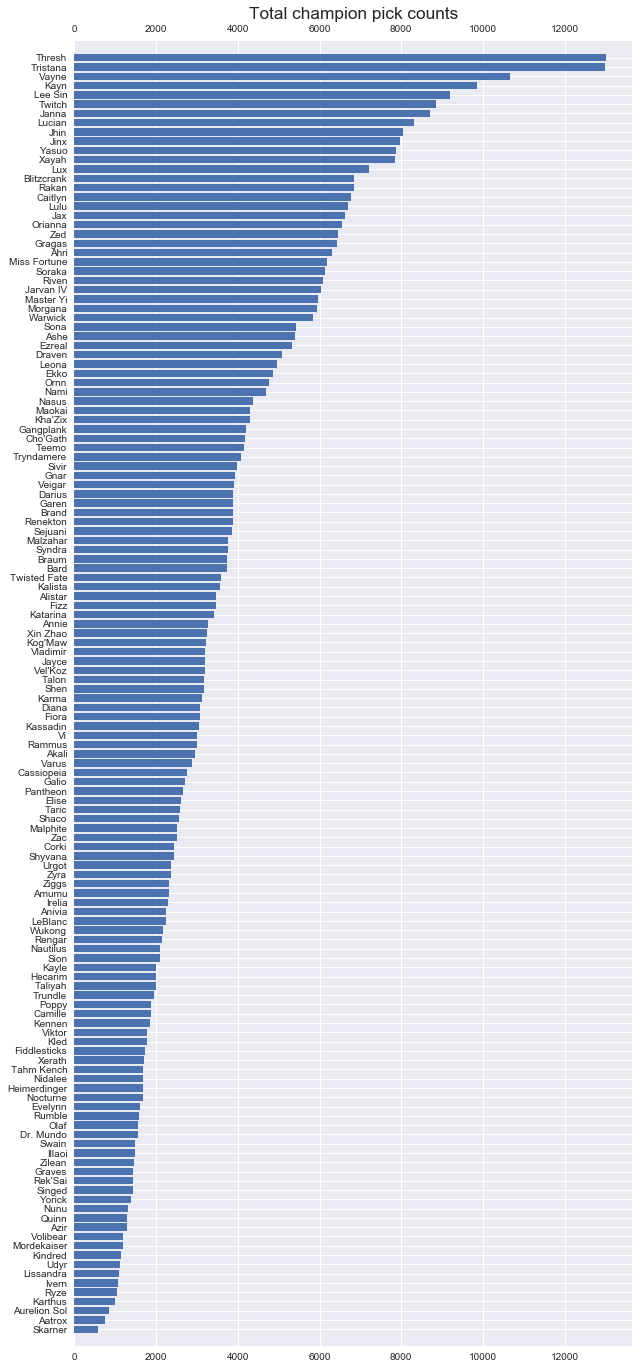

In [51]:
# Let's make some graphs
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Tally up all the times each champion was used
used = champ_cols[:10]
champ_counts = df[used[0]].value_counts()
for i in range(1, len(used)):
  champ_counts += df[used[i]].value_counts()

champ_counts = champ_counts.sort_values()
print('Number of different champions:', len(champ_counts))
# Note: to this day there are actually 148 champions, this data is a bit old

plt.figure(figsize=(10,24))
plt.barh(y=champ_counts.index, width=champ_counts)
plt.margins(y=.01)
plt.tick_params(axis='x', labeltop=True)
plt.title('Total champion pick counts', fontsize='xx-large');

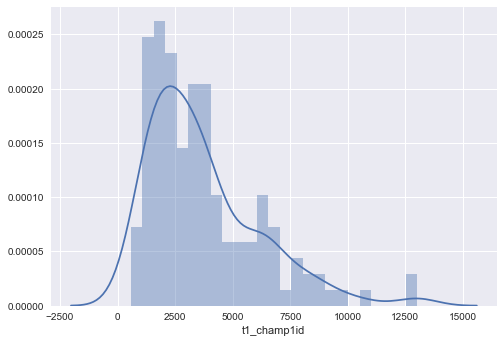

In [52]:
# Champion count distribution
import seaborn as sns
sns.distplot(champ_counts, bins=25);

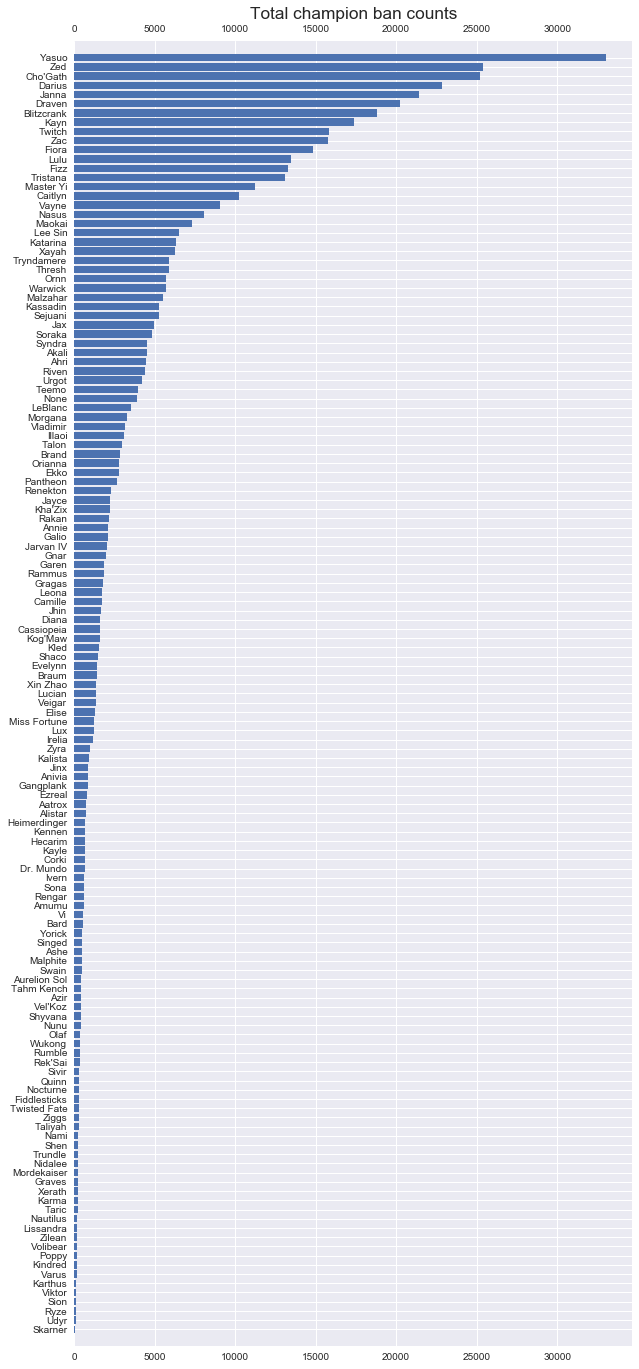

In [53]:
# Tally up all the times each champion was banned
used = champ_cols[10:]
champ_counts = df[used[0]].value_counts()
for i in range(1, len(used)):
  champ_counts += df[used[i]].value_counts()

champ_counts = champ_counts.sort_values()
# Note: to this day there are actually 148 champions, this data is a bit old

plt.figure(figsize=(10,24))
plt.barh(y=champ_counts.index, width=champ_counts)
plt.margins(y=.01)
plt.tick_params(axis='x', labeltop=True)
plt.title('Total champion ban counts', fontsize='xx-large');

Number of different spells: 9


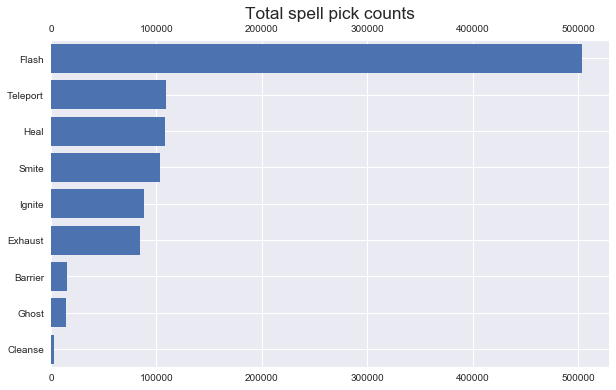

In [54]:
# Tally up each spell used the same way
spell_counts = df[spell_cols[0]].value_counts()
for i in range(1, len(spell_cols)):
  spell_counts += df[spell_cols[i]].value_counts()

spell_counts = spell_counts.sort_values()
print('Number of different spells:', len(spell_counts))

plt.figure(figsize=(10,6))
plt.barh(y=spell_counts.index, width=spell_counts)
plt.margins(y=.01)
plt.tick_params(axis='x', labeltop=True)
plt.title('Total spell pick counts', fontsize='xx-large');

## Begin to choose which features, if any, to exclude. Would some features "leak" future information?

None of these columns should leak information (aside from the target, of course)

In [55]:
# all columns
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [0]:
# There are some columns we should for sure leave out
target = 'winner'
cols_to_drop = ['gameId', 'creationTime', 'seasonId']

# And some groups we might decide to keep or drop altogether
champs_used = champ_cols[:10]
champs_banned = champ_cols[10:]
spells_used = spell_cols

  # Which team did certain things first
first_stats = df.columns[5:11] 
  # Tally of certain kills each team got
kill_stats = df.columns[26:31].append(df.columns[51:56]) 

# 'gameduration' is the only column not included in any of these groups

### Shallow decision tree baselines

In [0]:
# Sort by 'creationTime' so we can do the time-based split
df = df.sort_values(by='creationTime')

In [75]:
# Train/val/test split
cut1 = int(len(df) * .7)
cut2 = int(len(df) * .85)
train = df[:cut1] # first 70% goes to train
val = df[cut1:cut2] # next 15% goes to val
test = df[cut2:] # last 15% goes to test

df.shape, train.shape, val.shape, test.shape

((51490, 61), (36043, 61), (7723, 61), (7724, 61))

In [81]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# Using all columns
target = 'winner'
features = train.columns.drop([target] + cols_to_drop)

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.9500194225042082


In [82]:
# That seems high
# Double checking here, but I did not leak the target into the model
features

Index(['gameDuration', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id',
       't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1',
       't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2',
       't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id',
       't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_

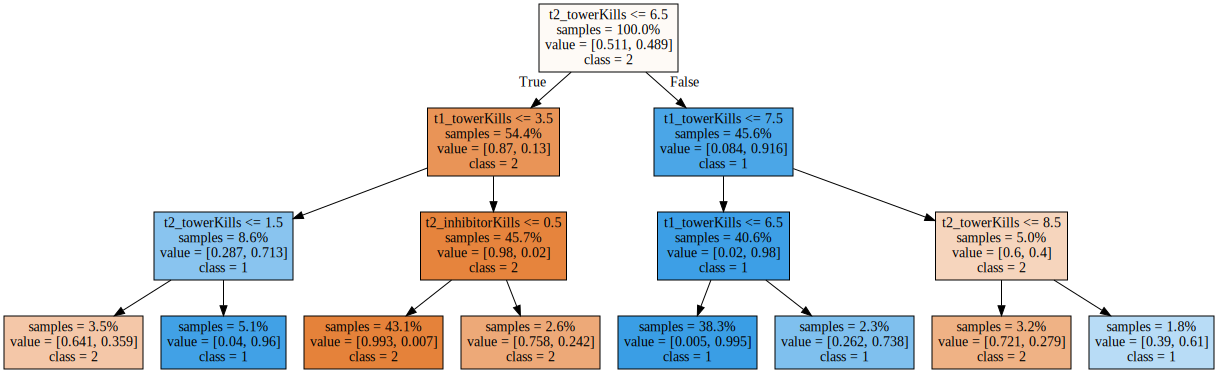

In [83]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file = None,
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False, 
    proportion=True
)

graphviz.Source(dot_data)

Interesting, so we can predict match winners with 95% accuracy purely by looking at the number of towers and inhibitors each team kills.

However, the simple web tool I want to build just involves predicting the winner based on champions picked so let's try that.

In [84]:
# Using just champions picked
target = 'winner'
features = champs_used

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.4991583581509776


Not so great, just flipping a coin there.  However, I have a few ideas for feature engineering that should improve it.  This will be an interesting excercise.

Potential feature engineering:
- How many popularly picked champions did each team pick?
- How many popularly banned champions did each team pick?
- What is the total/average win rate of the champions on each team?
  - Rates calculated with just the test set, of course
- What is the team composition?
  - This may be tricky, since I don't have chapion types in my existing data
  - Type examples: DPS, support, carry, jungle

Other methods of encoding may also work differently.  However simple one-hot encoding is not the answer, I tried it and it took almost 50 times longer to execute and had the same accuracy.

In [0]:
# Saving the converted and split data in separate files for ease of use later
test.to_csv('LoL_test_cleaned.csv')
val.to_csv('LoL_val_cleaned.csv')
train.to_csv('LoL_train_cleaned.csv')